In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
df_pop = pd.read_csv('../../data/2015_demo_geo.csv')
dfdg = df_pop.drop('Unnamed: 0', axis=1)
dfdg.head()

,state_name,state_code,geo_id,county_name,area_sqmi,log_area_sqmi,pop_est_2015,log_pop_est_2015,pop_den_2015,log_pop_den_2015,tot_pop_ch_2015,pop_ch_10000_2015,lat,long
0,Alabama,AL,1001,"Autauga County, AL",594.439,2.774107,55347,4.743094,93.107956,1.968987,57,10.298661,32.532237,-86.646440
1,Alabama,AL,1003,"Baldwin County, AL",1589.808,3.201345,203709,5.309010,128.134341,2.107666,3996,196.162173,30.659218,-87.746067
2,Alabama,AL,1005,"Barbour County, AL",884.877,2.946883,26489,4.423066,29.935234,1.476183,-326,-123.069954,31.870253,-85.405104
3,Alabama,AL,1007,"Bibb County, AL",622.583,2.794197,22583,4.353782,36.273075,1.559584,34,15.055573,33.015893,-87.127148
4,Alabama,AL,1009,"Blount County, AL",644.807,2.809430,57673,4.760973,89.442267,1.951543,15,2.600870,33.977358,-86.566440


In [46]:
dfb1 = pd.read_csv('../../data/2015_hot_bar_nofill.csv')
dfhb = dfb1.drop('Unnamed: 0', axis=1)
dfhb.describe()

,geo_id,hot_big,bar_big
count,2863.000000,2863.000000,2125.000000
mean,30550.866923,19.749563,19.040000
std,15209.228034,46.075908,48.926978
min,1001.000000,1.000000,1.000000
25%,19025.000000,3.000000,2.000000
50%,29203.000000,7.000000,5.000000
75%,45084.000000,19.000000,16.000000
max,56045.000000,1165.000000,890.000000


In [50]:
merged_nr_df = pd.merge(dfdg, dfhb, on='geo_id', how='left')
resultD = merged_nr_df.iloc[np.where(merged_nr_df["bar_small"] == 'D')]
resultS = merged_nr_df.iloc[np.where(merged_nr_df["bar_small"] == 'S')]
resultNDS = merged_nr_df.iloc[np.where(merged_nr_df["bar_small"] != 'D') and np.where(merged_nr_df["bar_small"] != 'S')]
merged_nr_df.describe()

,geo_id,area_sqmi,log_area_sqmi,pop_est_2015,log_pop_est_2015,pop_den_2015,log_pop_den_2015,tot_pop_ch_2015,pop_ch_10000_2015,lat,long,hot_big,bar_big
count,3142.000000,3142.000000,3142.000000,3.142000e+03,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,2861.000000,2125.000000
mean,30383.649268,1124.147226,2.818862,1.022975e+05,4.460866,270.187648,1.642004,799.305856,12.256570,38.455338,-92.177403,19.761622,19.040000
std,15162.508374,3612.528212,0.393841,3.292097e+05,0.644706,1813.598397,0.772206,3947.176682,127.374774,5.309455,13.741661,46.089755,48.926978
min,1001.000000,2.051000,0.311966,8.900000e+01,1.949390,0.038029,-1.419881,-10488.000000,-669.056153,19.597764,-164.188912,1.000000,1.000000
25%,18177.500000,430.830500,2.634306,1.098600e+04,4.040839,16.902931,1.227962,-88.000000,-52.346015,34.693649,-98.222532,3.000000,2.000000
50%,29176.000000,616.006000,2.789585,2.569850e+04,4.409908,44.759655,1.650887,3.000000,2.426814,38.379918,-90.379763,7.000000,5.000000
75%,45080.500000,924.004250,2.965674,6.752750e+04,4.829481,116.476776,2.066239,238.000000,71.799768,41.818396,-83.426948,19.000000,16.000000
max,56045.000000,145492.713000,5.162841,1.017029e+07,7.007333,72586.423023,4.860855,90451.000000,2232.142857,69.449343,178.338813,1165.000000,890.000000


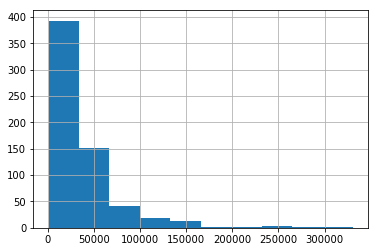

In [43]:
resultD['pop_est_2015'].hist()
plt.show()

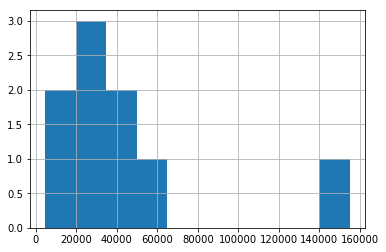

In [44]:
resultS['pop_est_2015'].hist()
plt.show()

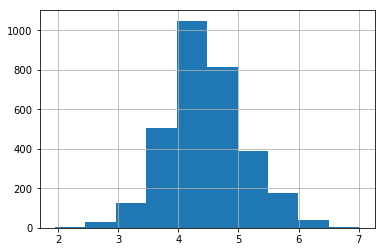

In [45]:
resultNDS['log_pop_est_2015'].hist()
plt.show()

In [57]:
print((merged_nr_df['hot_small'] == 'D').sum(), (merged_nr_df['hot_small'] == 'S').sum())

838 2


In [58]:
(merged_nr_df['hot_small']=='1').sum()

0

In [62]:
result_no_noval = merged_nr_df.loc[(merged_nr_df['bar_small'] != 'S') & (merged_nr_df['hot_small'] != 'S') 
                              & (merged_nr_df['bar_small'] != 'D') & (merged_nr_df['hot_small'] != 'D')]
print(len(result4), len(result_no_noval))

3142 1870


In [63]:
result_no_hot_noval = merged_nr_df.loc[(merged_nr_df['hot_small'] != 'S') 
                              & (merged_nr_df['hot_small'] != 'D')]
result_no_hot_noval['hot_small'] = result_no_hot_noval['hot_small'].astype(float)
min_hot_noval = result_no_hot_noval['hot_small'].min()
min_hot_noval

/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


3.0

In [64]:
result_no_bar_noval = merged_nr_df.loc[(merged_nr_df['bar_small'] != 'S') 
                              & (merged_nr_df['bar_small'] != 'D')]
result_no_bar_noval['bar_small'] = result_no_bar_noval['bar_small'].astype(float)
min_bar_noval = result_no_bar_noval['bar_small'].min()
min_bar_noval

/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


3.0

In [65]:
# result_no_hot_noval_big = result4.loc[(result4['hot_big'] != 'S') & (result4['hot_big'] != 'D')]
merged_nr_df['hot_big'] = merged_nr_df['hot_big'].astype(float)
min_hot_noval_big = merged_nr_df['hot_big'].min()


# result_no_bar_noval_big = result4.loc[(result4['bar_big'] != 'S') & (result4['bar_big'] != 'D')]
merged_nr_df['bar_big'] = merged_nr_df['bar_big'].astype(float)
min_bar_noval_big = merged_nr_df['bar_big'].min()
print(min_hot_noval_big, min_bar_noval_big)

merged_nr_df['bar_big'].fillna(min_bar_noval_big, inplace=True)
merged_nr_df['hot_big'].fillna(min_hot_noval_big, inplace=True)

1.0 1.0


In [66]:
merged_nr_df['bar_small'].fillna(3, inplace=True)
merged_nr_df['hot_small'].fillna(3, inplace=True)

In [67]:
merged_nr_df.replace('D', 1.5, inplace=True)
merged_nr_df.replace('S', 1.5, inplace=True)

In [68]:
merged_nr_df['hotels'] = merged_nr_df['hot_big'].astype(float) + merged_nr_df['hot_small'].astype(float)
merged_nr_df['bars'] = merged_nr_df['bar_big'].astype(float) + merged_nr_df['bar_small'].astype(float)

In [69]:
merged_nr_df

,state_name,state_code,geo_id,county_name,area_sqmi,log_area_sqmi,pop_est_2015,log_pop_est_2015,pop_den_2015,log_pop_den_2015,tot_pop_ch_2015,pop_ch_10000_2015,lat,long,hot_big,hot_small,bar_big,bar_small,hotels,bars
0,Alabama,AL,1001,"Autauga County, AL",594.439,2.774107,55347,4.743094,93.107956,1.968987,57,10.298661,32.532237,-86.646440,8.0,1.5,1.0,3,9.5,4.0
1,Alabama,AL,1003,"Baldwin County, AL",1589.808,3.201345,203709,5.309010,128.134341,2.107666,3996,196.162173,30.659218,-87.746067,51.0,34,12.0,24,85.0,36.0
2,Alabama,AL,1005,"Barbour County, AL",884.877,2.946883,26489,4.423066,29.935234,1.476183,-326,-123.069954,31.870253,-85.405104,9.0,3,1.0,3,12.0,4.0
3,Alabama,AL,1007,"Bibb County, AL",622.583,2.794197,22583,4.353782,36.273075,1.559584,34,15.055573,33.015893,-87.127148,1.0,3,1.0,3,4.0,4.0
4,Alabama,AL,1009,"Blount County, AL",644.807,2.809430,57673,4.760973,89.442267,1.951543,15,2.600870,33.977358,-86.566440,2.0,3,1.0,3,5.0,4.0
5,Alabama,AL,1011,"Bullock County, AL",622.806,2.794353,10696,4.029221,17.173887,1.234869,-133,-124.345550,32.101759,-85.717261,1.0,3,1.0,3,4.0,4.0
6,Alabama,AL,1013,"Butler County, AL",776.828,2.890325,20154,4.304361,25.943967,1.414036,-122,-60.533889,31.751667,-86.681969,7.0,3,1.0,3,10.0,4.0
7,Alabama,AL,1015,"Calhoun County, AL",605.889,2.782393,115620,5.063033,190.827033,2.280640,-373,-32.260855,33.771706,-85.822513,27.0,8,4.0,6,35.0,10.0
8,Alabama,AL,1017,"Chambers County, AL",596.531,2.775633,34123,4.533047,57.202392,1.757414,71,20.807080,32.915504,-85.394032,3.0,1.5,1.0,3,4.5,4.0
9,Alabama,AL,1019,"Cherokee County, AL",553.720,2.743290,25859,4.412612,46.700498,1.669322,-136,-52.592908,34.069515,-85.654242,3.0,4,1.0,3,7.0,4.0


In [71]:
result4 = pd.read_csv('../../data/2015_master_sd_rnd_nan_to_min.csv')
result4_toy = pd.read_csv('../../data/2015_toy_sd_rnd_nan_to_min.csv')

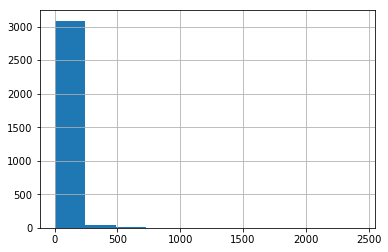

In [72]:
result4_toy['hotels'].hist();

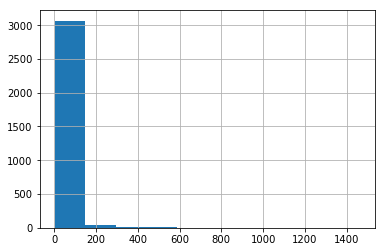

In [73]:
result4_toy['bars'].hist();

In [74]:
result4_toy['log_bars'] = np.log10(result4_toy['bars'])
result4_toy['log_hotels'] = np.log10(result4_toy['hotels'])

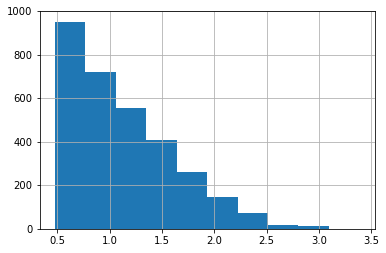

In [75]:
result4_toy['log_hotels'].hist();

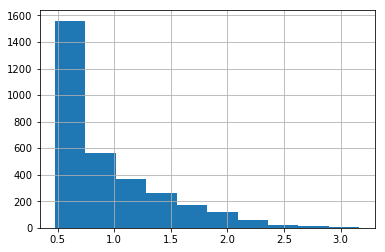

In [76]:
result4_toy['log_bars'].hist();

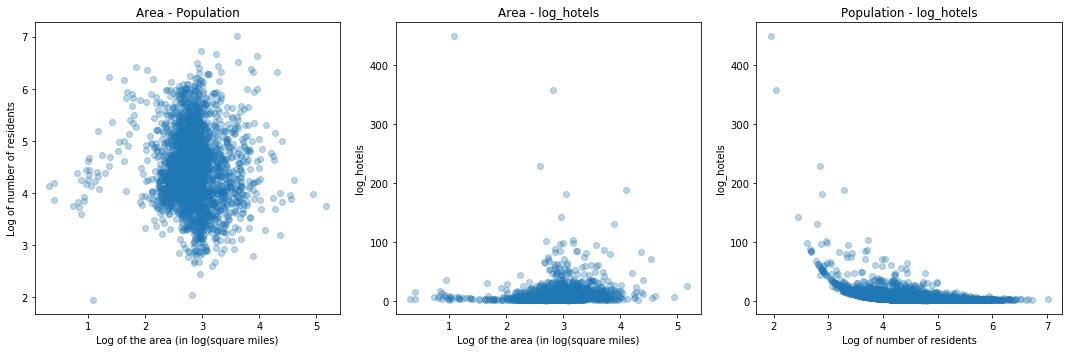

In [84]:
x = result4['log_area_sqmi']
y = result4['log_pop_est_2015']
z = result4_toy['hotels']/result4_toy['pop_est_2015']*10000

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(15, 5))

ax0.scatter(x, y, alpha=0.3);
ax0.set_title('Area - Population')
ax0.set_xlabel('Log of the area (in log(square miles)')
ax0.set_ylabel('Log of number of residents')

ax1.scatter(x, z, alpha=0.3);
ax1.set_title('Area - log_hotels')
ax1.set_xlabel('Log of the area (in log(square miles)')
ax1.set_ylabel('log_hotels')

ax2.scatter(y, z, alpha=0.3);
ax2.set_title('Population - log_hotels')
ax2.set_xlabel('Log of number of residents')
ax2.set_ylabel('log_hotels')

plt.savefig('../../figures/area_pop_hotels_scatters.png')
fig.tight_layout()

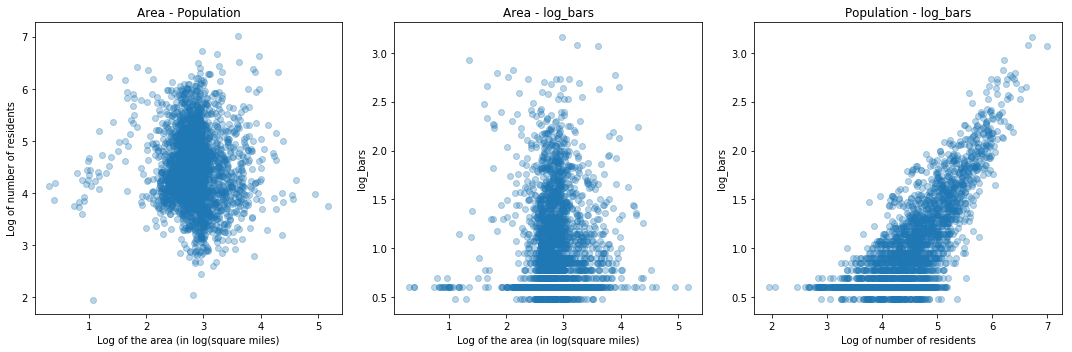

In [82]:
x = result4['log_area_sqmi']
y = result4['log_pop_est_2015']
z = result4_toy['log_bars']

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(15, 5))

ax0.scatter(x, y, alpha=0.3);
ax0.set_title('Area - Population')
ax0.set_xlabel('Log of the area (in log(square miles)')
ax0.set_ylabel('Log of number of residents')

ax1.scatter(x, z, alpha=0.3);
ax1.set_title('Area - log_bars')
ax1.set_xlabel('Log of the area (in log(square miles)')
ax1.set_ylabel('log_bars')

ax2.scatter(y, z, alpha=0.3);
ax2.set_title('Population - log_bars')
ax2.set_xlabel('Log of number of residents')
ax2.set_ylabel('log_bars')

plt.savefig('../../figures/area_pop_bars_scatters.png')
fig.tight_layout()